# 📈 Chapter 5: Running Time Analysis

Welcome to the interactive exploration of **Algorithm Complexity and Performance Analysis**!

This notebook will help you understand:
- How to measure and analyze algorithm performance
- Big-O notation and asymptotic complexity
- Why algorithm choice matters more than implementation details
- Practical techniques for performance analysis

## 🎯 Learning Objectives

By the end of this notebook, you'll be able to:
- Measure actual execution times of algorithms
- Analyze algorithms using operation counting
- Classify algorithms by their Big-O complexity
- Make informed decisions about algorithm selection
- Visualize complexity differences

In [1]:
# Import required libraries
import sys
import os
sys.path.append('../')

import time
import timeit
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

# Import our complexity analysis code
from chapter_05_running_time_analysis.code.complexity_analysis import (
    time_function, timing_example, ComplexityAnalyzer, BigOAnalyzer
)

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("🎯 Ready to analyze algorithm performance!")

✅ Libraries imported successfully!
🎯 Ready to analyze algorithm performance!


## 🕒 Section 1: Timing Algorithms

The first step in performance analysis is measuring how long algorithms actually take to run.

### Why Timing Matters

- **Real-world performance** depends on actual execution time
- Different approaches to the same problem can have vastly different speeds
- Hardware and input size dramatically affect performance
- Timing helps us validate our complexity analysis

In [2]:
# Interactive timing demonstration
print("=== Algorithm Timing Demonstration ===\n")

# Define different approaches to summing numbers
def sum_loop(n):
    """O(n) loop approach"""
    total = 0
    for i in range(n + 1):
        total += i
    return total

def sum_formula(n):
    """O(1) mathematical formula"""
    return n * (n + 1) // 2

def sum_recursive(n):
    """O(n) recursive approach (warning: stack overflow for large n!)"""
    if n <= 0:
        return 0
    return n + sum_recursive(n - 1)

# Test with different sizes
sizes = [100, 1000, 10000, 50000]

print("Comparing different approaches to sum first n numbers:")
print("Size\t\tLoop (O(n))\tFormula (O(1))\tRecursive (O(n))")
print("-" * 70)

for n in sizes:
    # Time each approach
    _, time_loop, _, _ = time_function(sum_loop, n)
    _, time_formula, _, _ = time_function(sum_formula, n)
    
    # Recursive only for small n to avoid stack overflow
    if n <= 1000:
        _, time_recursive, _, _ = time_function(sum_recursive, n)
        recursive_str = f"{time_recursive:.6f}"
    else:
        recursive_str = "N/A (too slow)"
    
    print(f"{n:8}\t{time_loop:.6f}\t\t{time_formula:.6f}\t\t{recursive_str}")

print("\n🎯 Key Insight: Formula is fastest and scales best!")

=== Algorithm Timing Demonstration ===

Comparing different approaches to sum first n numbers:
Size		Loop (O(n))	Formula (O(1))	Recursive (O(n))
----------------------------------------------------------------------
     100	0.000005		0.000000		0.000008
    1000	0.000050		0.000000		0.000145
   10000	0.000531		0.000000		N/A (too slow)
   50000	0.002652		0.000001		N/A (too slow)

🎯 Key Insight: Formula is fastest and scales best!


In [4]:
# Interactive timing widget
def create_timing_widget():
    """Create an interactive timing comparison widget"""
    
    size_slider = widgets.IntSlider(
        value=1000,
        min=10,
        max=10000,
        step=100,
        description='Input Size:',
        continuous_update=False
    )
    
    algorithm_selector = widgets.SelectMultiple(
        options=['Loop (O(n))', 'Formula (O(1))', 'Recursive (O(n))'],
        value=['Loop (O(n))', 'Formula (O(1))'],
        description='Algorithms:',
        rows=3
    )
    
    output_area = widgets.Output()
    
    def run_timing_comparison(b):
        with output_area:
            clear_output(wait=True)
            
            n = size_slider.value
            selected = algorithm_selector.value
            
            print(f"Timing comparison for input size n = {n:,}")
            print("=" * 50)
            
            results = {}
            
            if 'Loop (O(n))' in selected:
                _, time_loop, _, _ = time_function(sum_loop, n)
                results['Loop (O(n))'] = time_loop
                
            if 'Formula (O(1))' in selected:
                _, time_formula, _, _ = time_function(sum_formula, n)
                results['Formula (O(1))'] = time_formula
                
            if 'Recursive (O(n))' in selected and n <= 1000:
                _, time_recursive, _, _ = time_function(sum_recursive, n)
                results['Recursive (O(n))'] = time_recursive
            elif 'Recursive (O(n))' in selected:
                print("⚠️  Recursive approach skipped (n too large for stack)")
            
            # Display results
            for algo, time_taken in results.items():
                print(f"{algo:15}: {time_taken:.8f} seconds")
            
            # Find fastest
            if results:
                fastest = min(results, key=results.get)
                print(f"\n🏆 Fastest: {fastest}")
    
    run_button = widgets.Button(description='Run Timing Test')
    run_button.on_click(run_timing_comparison)
    
    # Layout
    controls = widgets.VBox([size_slider, algorithm_selector, run_button])
    display(widgets.HBox([controls, output_area]))
    
    # Run initial comparison
    run_timing_comparison(None)

print("🎮 Interactive Timing Comparison")
print("Adjust the input size and select algorithms to compare their performance:")
create_timing_widget()

🎮 Interactive Timing Comparison
Adjust the input size and select algorithms to compare their performance:


## 📊 Section 2: Complexity Analysis

Timing tells us about specific cases, but **complexity analysis** helps us understand how algorithms behave as input size grows.

### Key Concepts

- **Big-O Notation**: Upper bound on growth rate
- **Worst Case**: Most important for guarantees
- **Average Case**: Expected performance
- **Best Case**: Optimistic scenario

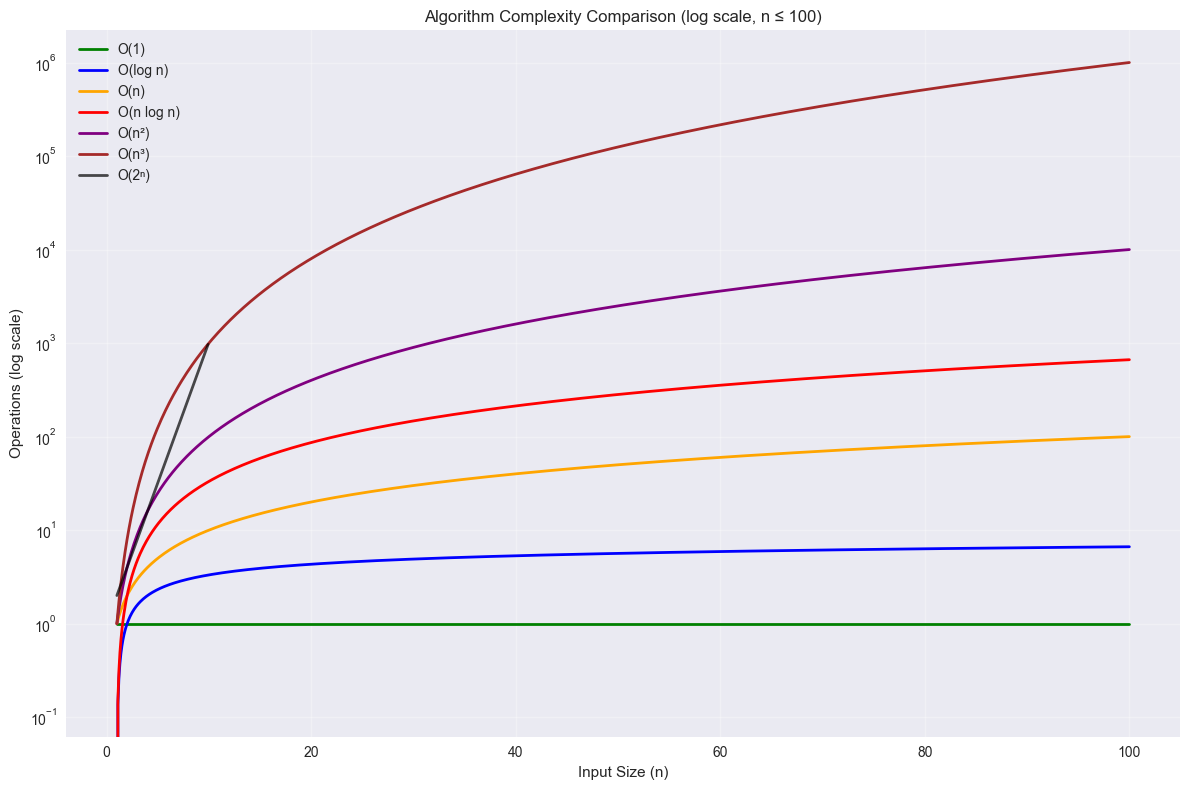

In [5]:
# Interactive complexity visualization
def plot_complexities(max_n=100, show_log=True):
    """Create interactive complexity comparison plot"""
    
    n = np.linspace(1, max_n, 1000)
    
    plt.figure(figsize=(12, 8))
    
    # Define complexity functions
    complexities = {
        'O(1)': np.ones_like(n),
        'O(log n)': np.log2(n),
        'O(n)': n,
        'O(n log n)': n * np.log2(n),
        'O(n²)': n**2,
        'O(n³)': n**3,
        'O(2ⁿ)': 2**n
    }
    
    colors = ['green', 'blue', 'orange', 'red', 'purple', 'brown', 'black']
    
    for i, (label, func) in enumerate(complexities.items()):
        # Handle exponential separately (limit n to avoid overflow)
        if '2ⁿ' in label:
            n_exp = n[n <= 10]  # Only plot for small n
            plt.plot(n_exp, func[:len(n_exp)], 
                    label=label, color=colors[i], linewidth=2, alpha=0.7)
        else:
            plt.plot(n, func, label=label, color=colors[i], linewidth=2)
    
    plt.xlabel('Input Size (n)')
    plt.ylabel('Operations')
    plt.title(f'Algorithm Complexity Comparison (n ≤ {max_n})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    if show_log:
        plt.yscale('log')
        plt.ylabel('Operations (log scale)')
        plt.title(f'Algorithm Complexity Comparison (log scale, n ≤ {max_n})')
    
    plt.tight_layout()
    plt.show()

# Interactive controls
max_n_slider = widgets.IntSlider(
    value=100,
    min=10,
    max=1000,
    step=10,
    description='Max n:'
)

log_scale_toggle = widgets.Checkbox(
    value=True,
    description='Log scale'
)

def update_plot(b):
    clear_output(wait=True)
    display(controls)
    plot_complexities(max_n_slider.value, log_scale_toggle.value)

update_button = widgets.Button(description='Update Plot')
update_button.on_click(update_plot)

controls = widgets.HBox([max_n_slider, log_scale_toggle, update_button])
display(controls)
plot_complexities()

=== Search Algorithm Analysis ===

Search Performance Analysis:
n		Linear Ops	Binary Ops	Linear/Binary Ratio
------------------------------------------------------------
     100	      26	      12	     2.2x
     500	     198	      16	    12.4x
    1000	     492	      18	    27.3x
    5000	    1737	      24	    72.4x
   10000	    2973	      26	   114.3x


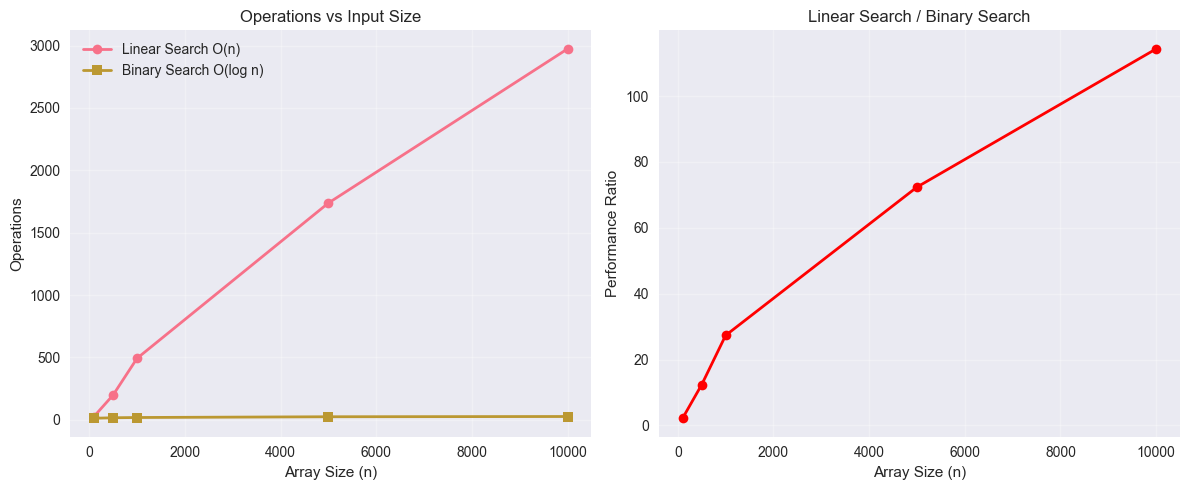


🎯 Key Insights:
- Binary search is dramatically faster for large arrays
- The performance gap grows with input size
- Always consider the data structure and access patterns!


In [6]:
# Search algorithm comparison with operation counting
print("=== Search Algorithm Analysis ===\n")

analyzer = ComplexityAnalyzer()

# Create test data
sizes = [100, 500, 1000, 5000, 10000]
results = []

for n in sizes:
    # Create random array
    arr = list(range(n))
    random.shuffle(arr)
    sorted_arr = sorted(arr)
    
    # Target in middle
    target = n // 2
    
    # Linear search
    _, linear_ops = analyzer.analyze_linear_search(arr, target)
    
    # Binary search
    _, binary_ops = analyzer.analyze_binary_search(sorted_arr, target)
    
    results.append({
        'n': n,
        'linear_ops': linear_ops,
        'binary_ops': binary_ops,
        'linear_ratio': linear_ops / n,
        'binary_ratio': binary_ops / math.log2(n) if n > 1 else binary_ops
    })

# Display results table
print("Search Performance Analysis:")
print("n\t\tLinear Ops\tBinary Ops\tLinear/Binary Ratio")
print("-" * 60)

for r in results:
    ratio = r['linear_ops'] / r['binary_ops'] if r['binary_ops'] > 0 else float('inf')
    print(f"{r['n']:8}\t{r['linear_ops']:8}\t{r['binary_ops']:8}\t{ratio:8.1f}x")

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
n_vals = [r['n'] for r in results]
linear_ops = [r['linear_ops'] for r in results]
binary_ops = [r['binary_ops'] for r in results]

plt.plot(n_vals, linear_ops, 'o-', label='Linear Search O(n)', linewidth=2)
plt.plot(n_vals, binary_ops, 's-', label='Binary Search O(log n)', linewidth=2)
plt.xlabel('Array Size (n)')
plt.ylabel('Operations')
plt.title('Operations vs Input Size')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
ratios = [r['linear_ops'] / r['binary_ops'] for r in results]
plt.plot(n_vals, ratios, 'ro-', linewidth=2)
plt.xlabel('Array Size (n)')
plt.ylabel('Performance Ratio')
plt.title('Linear Search / Binary Search')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("- Binary search is dramatically faster for large arrays")
print("- The performance gap grows with input size")
print("- Always consider the data structure and access patterns!")

## 🎮 Section 3: Interactive Complexity Explorer

Let's create an interactive tool to explore how different algorithms behave with various input sizes and patterns.

In [7]:
# Big-O Analyzer Interactive Demo
bigo_analyzer = BigOAnalyzer()

def create_complexity_explorer():
    """Interactive complexity analysis tool"""
    
    size_slider = widgets.IntSlider(
        value=50,
        min=5,
        max=100,
        step=5,
        description='Input Size:'
    )
    
    complexity_selector = widgets.SelectMultiple(
        options=['O(1)', 'O(log n)', 'O(n)', 'O(n²)', 'O(2ⁿ)'],
        value=['O(1)', 'O(log n)', 'O(n)'],
        description='Complexities:'
    )
    
    output_area = widgets.Output()
    plot_area = widgets.Output()
    
    def analyze_complexity(b):
        with output_area:
            clear_output(wait=True)
            
            n = size_slider.value
            selected = complexity_selector.value
            
            print(f"Complexity Analysis for n = {n}")
            print("=" * 40)
            
            results = {}
            
            if 'O(1)' in selected:
                result = bigo_analyzer.constant_time(n)
                results['O(1)'] = result
                
            if 'O(log n)' in selected:
                result = bigo_analyzer.logarithmic_time(n)
                results['O(log n)'] = result
                
            if 'O(n)' in selected:
                result = bigo_analyzer.linear_time(n)
                results['O(n)'] = result
                
            if 'O(n²)' in selected and n <= 100:  # Limit for performance
                result = bigo_analyzer.quadratic_time(n)
                results['O(n²)'] = result
            elif 'O(n²)' in selected:
                print("⚠️  O(n²) analysis skipped (n too large)")
                
            if 'O(2ⁿ)' in selected and n <= 20:  # Very restrictive limit
                result = bigo_analyzer.exponential_time(n)
                results['O(2ⁿ)'] = result
            elif 'O(2ⁿ)' in selected:
                print("⚠️  O(2ⁿ) analysis skipped (n too large for exponential)")
            
            # Display results
            for complexity, result in results.items():
                print(f"{complexity:8}: {result:,}")
            
            # Analysis
            if len(results) > 1:
                max_complexity = max(results, key=lambda k: results[k] if isinstance(results[k], int) else 0)
                print(f"\n📈 Dominant term: {max_complexity}")
    
    def plot_complexity_comparison(b):
        with plot_area:
            clear_output(wait=True)
            
            n = size_slider.value
            selected = complexity_selector.value
            
            # Generate data for plotting
            n_range = np.arange(1, n+1)
            plot_data = {}
            
            for complexity in selected:
                if complexity == 'O(1)':
                    plot_data[complexity] = np.ones_like(n_range)
                elif complexity == 'O(log n)':
                    plot_data[complexity] = np.log2(n_range)
                elif complexity == 'O(n)':
                    plot_data[complexity] = n_range
                elif complexity == 'O(n²)' and n <= 100:
                    plot_data[complexity] = n_range**2
                elif complexity == 'O(2ⁿ)' and n <= 20:
                    plot_data[complexity] = 2**n_range
            
            # Create plot
            plt.figure(figsize=(10, 6))
            for label, data in plot_data.items():
                plt.plot(n_range, data, label=label, linewidth=2)
            
            plt.xlabel('Input Size (n)')
            plt.ylabel('Operations')
            plt.title(f'Complexity Comparison (n = 1 to {n})')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
    
    analyze_button = widgets.Button(description='Analyze')
    analyze_button.on_click(analyze_complexity)
    
    plot_button = widgets.Button(description='Plot Comparison')
    plot_button.on_click(plot_complexity_comparison)
    
    # Layout
    controls = widgets.VBox([size_slider, complexity_selector, 
                           widgets.HBox([analyze_button, plot_button])])
    display(widgets.HBox([controls, widgets.VBox([output_area, plot_area])]))

print("🎮 Interactive Complexity Explorer")
print("Experiment with different input sizes and complexity classes:")
create_complexity_explorer()

🎮 Interactive Complexity Explorer
Experiment with different input sizes and complexity classes:


## 🧪 Section 4: Practical Exercises

Let's apply what we've learned with some hands-on exercises.

In [8]:
# Exercise 1: Algorithm Selection Challenge
print("=== Exercise 1: Algorithm Selection Challenge ===\n")

def algorithm_selection_quiz():
    """Interactive quiz for algorithm selection"""
    
    questions = [
        {
            'question': 'You need to search for an item in a sorted array of 1 million elements. Which is best?',
            'options': ['Linear Search O(n)', 'Binary Search O(log n)', 'Bubble Sort O(n²)'],
            'correct': 1,
            'explanation': 'Binary search is perfect for sorted arrays - logarithmic time vs linear!'
        },
        {
            'question': 'You need to find if two elements sum to a target in an unsorted array of 1000 elements.',
            'options': ['Nested loops O(n²)', 'Sort then binary search O(n log n)', 'Hash table O(n)'],
            'correct': 2,
            'explanation': 'Hash table gives us O(n) lookup after O(n) preprocessing!'
        },
        {
            'question': 'You need to sort an array that is already nearly sorted.',
            'options': ['QuickSort O(n log n)', 'Insertion Sort O(n²) worst, O(n) best', 'Merge Sort O(n log n)'],
            'correct': 1,
            'explanation': 'Insertion Sort excels on nearly sorted data - adaptive algorithms matter!'
        }
    ]
    
    score = 0
    
    for i, q in enumerate(questions, 1):
        print(f"Question {i}: {q['question']}")
        for j, option in enumerate(q['options']):
            print(f"  {j+1}. {option}")
        
        # Get user input (in a real implementation, this would be interactive)
        # For now, we'll show the correct answers
        correct_option = q['options'][q['correct']]
        print(f"\n✅ Correct: {correct_option}")
        print(f"💡 {q['explanation']}\n")
        score += 1
    
    print(f"🏆 Quiz Complete! Score: {score}/{len(questions)}")

algorithm_selection_quiz()

=== Exercise 1: Algorithm Selection Challenge ===

Question 1: You need to search for an item in a sorted array of 1 million elements. Which is best?
  1. Linear Search O(n)
  2. Binary Search O(log n)
  3. Bubble Sort O(n²)

✅ Correct: Binary Search O(log n)
💡 Binary search is perfect for sorted arrays - logarithmic time vs linear!

Question 2: You need to find if two elements sum to a target in an unsorted array of 1000 elements.
  1. Nested loops O(n²)
  2. Sort then binary search O(n log n)
  3. Hash table O(n)

✅ Correct: Hash table O(n)
💡 Hash table gives us O(n) lookup after O(n) preprocessing!

Question 3: You need to sort an array that is already nearly sorted.
  1. QuickSort O(n log n)
  2. Insertion Sort O(n²) worst, O(n) best
  3. Merge Sort O(n log n)

✅ Correct: Insertion Sort O(n²) worst, O(n) best
💡 Insertion Sort excels on nearly sorted data - adaptive algorithms matter!

🏆 Quiz Complete! Score: 3/3


In [9]:
# Exercise 2: Performance Prediction
print("=== Exercise 2: Performance Prediction ===\n")

def performance_prediction_exercise():
    """Predict algorithm performance for different scenarios"""
    
    scenarios = [
        {
            'scenario': 'Sorting 1 million social media posts by timestamp',
            'constraints': 'Posts arrive in random order, need to sort once',
            'recommendation': 'O(n log n) comparison sort (Timsort, Mergesort, or Heapsort)',
            'why': 'For large datasets, we need efficient general-purpose sorting'
        },
        {
            'scenario': 'Finding if a username exists in a database of 10 million users',
            'constraints': 'Usernames are unique, lookups happen frequently',
            'recommendation': 'Hash table O(1) average lookup',
            'why': 'Frequent lookups justify preprocessing for constant-time access'
        },
        {
            'scenario': 'Finding shortest path in a road network with 100,000 intersections',
            'constraints': 'Graph is sparse, need optimal path',
            'recommendation': 'Dijkstra\'s algorithm O((V+E) log V) with priority queue',
            'why': 'Graph algorithms need careful algorithm selection based on graph properties'
        }
    ]
    
    for i, scenario in enumerate(scenarios, 1):
        print(f"Scenario {i}: {scenario['scenario']}")
        print(f"Constraints: {scenario['constraints']}")
        print(f"\nRecommended: {scenario['recommendation']}")
        print(f"Why: {scenario['why']}\n")
        print("-" * 80)
    
    print("\n🎯 Key Takeaway: Algorithm selection depends on:")
    print("- Input size and distribution")
    print("- Operation frequency")
    print("- Required guarantees (worst-case vs average-case)")
    print("- Available data structures")
    print("- Memory constraints")

performance_prediction_exercise()

=== Exercise 2: Performance Prediction ===

Scenario 1: Sorting 1 million social media posts by timestamp
Constraints: Posts arrive in random order, need to sort once

Recommended: O(n log n) comparison sort (Timsort, Mergesort, or Heapsort)
Why: For large datasets, we need efficient general-purpose sorting

--------------------------------------------------------------------------------
Scenario 2: Finding if a username exists in a database of 10 million users
Constraints: Usernames are unique, lookups happen frequently

Recommended: Hash table O(1) average lookup
Why: Frequent lookups justify preprocessing for constant-time access

--------------------------------------------------------------------------------
Scenario 3: Finding shortest path in a road network with 100,000 intersections
Constraints: Graph is sparse, need optimal path

Recommended: Dijkstra's algorithm O((V+E) log V) with priority queue
Why: Graph algorithms need careful algorithm selection based on graph properties

## 📋 Summary & Key Takeaways

### What We've Learned

1. **Timing is Essential**: Always measure actual performance, not just theoretical complexity

2. **Big-O Matters**: Algorithm choice has exponential impact on performance as input grows

3. **Worst Case Rules**: Design for guarantees, not optimistic scenarios

4. **Context is King**: No single "best" algorithm - depends on your specific constraints

### Practical Guidelines

| Input Size | Acceptable Complexity | Examples |
|------------|----------------------|----------|
| n ≤ 10 | O(n!), O(2ⁿ) | Small problems, brute force |
| n ≤ 100 | O(n³) | Dynamic programming, small graphs |
| n ≤ 1,000 | O(n²) | Simple sorting, nested loops |
| n ≤ 100,000 | O(n log n) | Efficient sorting, tree operations |
| n ≤ 1,000,000 | O(n) | Linear scans, hash tables |
| n > 1,000,000 | O(log n), O(1) | Database operations, caching |

### Next Steps

- **Chapter 6**: Stacks and Queues - Linear data structures
- **Chapter 12-14**: Sorting and Selection algorithms
- **Chapter 15**: Hash Tables - Average O(1) operations
- **Chapter 20-21**: Graph algorithms and complexity

## 🎯 Final Challenge

Analyze the performance requirements for your current project:
- What are your input sizes?
- What operations are most frequent?
- Are you using the right data structures and algorithms?
- Could small changes yield big performance improvements?

Remember: **Performance analysis is an ongoing process** - revisit your choices as requirements evolve!